## Домашнее задание по теме «Элементарные методы анализа временных рядов»

### **Задание**

1. Возьмите из прошлого домашнего задания ряд — стационарный и не стационарный.
2. Приблизьте оба варианта моделями из класса MA.
3. Оцените качество и пришлите соображения, почему была выбрана та или иная модель.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")

In [4]:
none_stationary_series = dowjones_closing.Close

stationary_series = boxcox(dowjones_closing.Close, 0)
stationary_series = np.diff(stationary_series, 1)

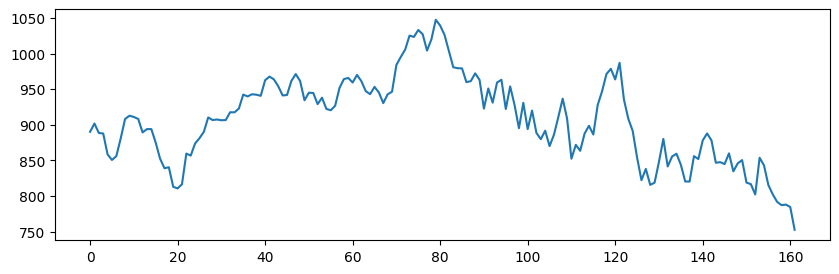

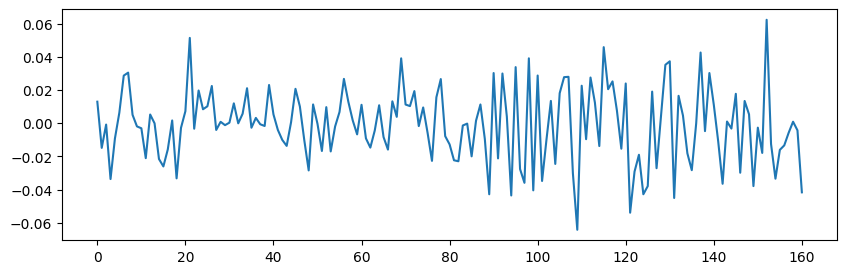

In [5]:
plt.figure(figsize=(10, 3))
plt.plot(none_stationary_series)
plt.show()
plt.figure(figsize=(10, 3))
plt.plot(stationary_series)
plt.show()

In [6]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

In [7]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

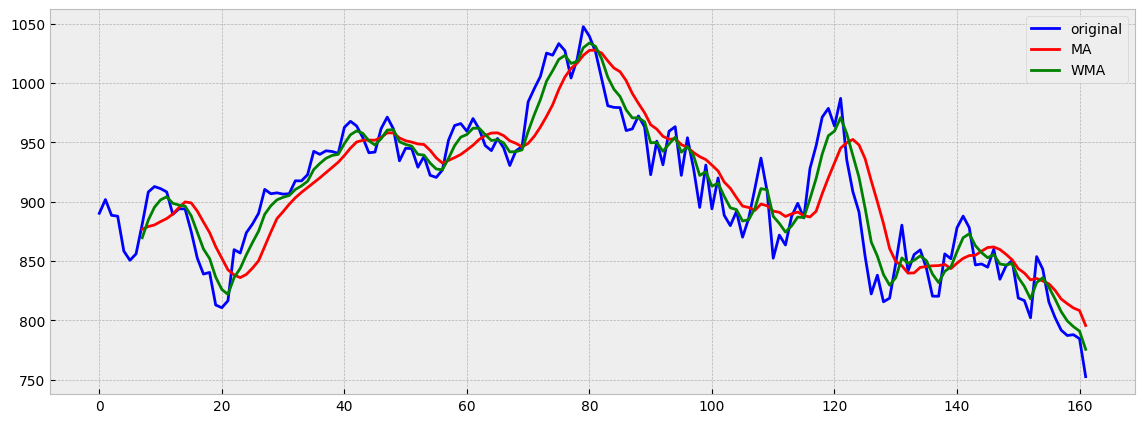

In [9]:
wma = weighted_moving_average(none_stationary_series, 8, [1,1,2,3,5,8,13,21])
ma = moving_average(none_stationary_series, 8)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 5))
    plt.plot(none_stationary_series, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.legend()

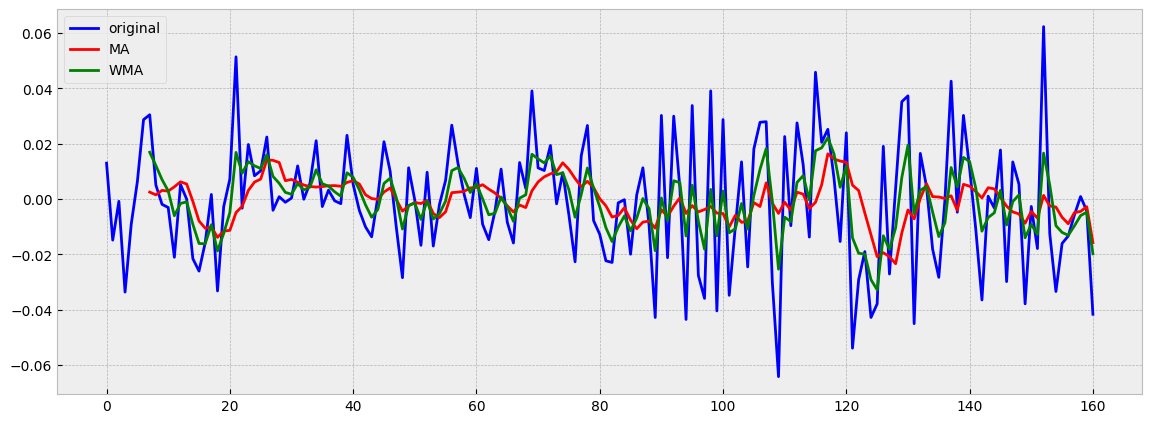

In [10]:
wma = weighted_moving_average(stationary_series, 8, [1,1,2,3,5,8,13,21])
ma = moving_average(stationary_series, 8)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 5))
    plt.plot(stationary_series, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.legend()

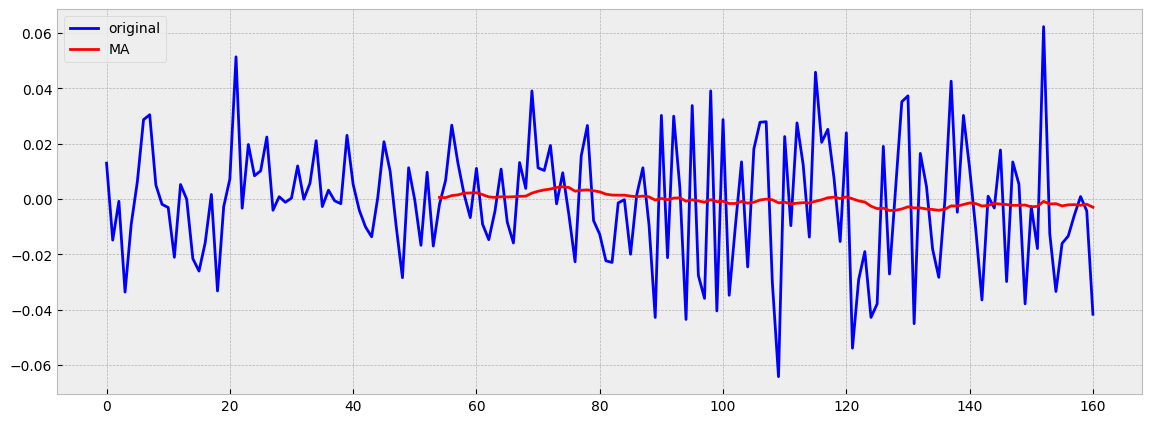

In [12]:
ma = moving_average(stationary_series, 55)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 5))
    plt.plot(stationary_series, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.legend()

### Попробуем для начальной серии подобрать наиболее оптимальный период сглаживания для ma

In [19]:
from sklearn.metrics import mean_squared_error

In [55]:
def mse(n, series):
    result = moving_average(series, n)
    err = mean_squared_error(result[n-1:], series[n-1:])
    return err

In [56]:
print(mse(5, none_stationary_series))

462.4100689113929


In [59]:
error = []
for i in range(2, 21):
    error.append(mse(i, none_stationary_series))

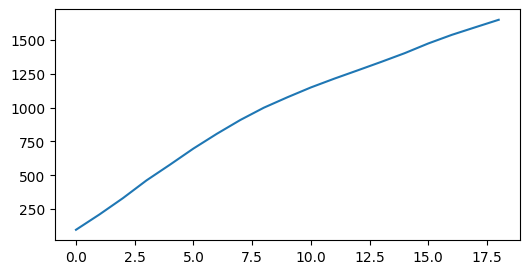

In [66]:
plt.figure(figsize = (6, 3)) 
pd.Series(error).plot()
plt.show()

### **Вывод:** Moving Average ухудшает точность с ростом периода сглаживания

In [68]:
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

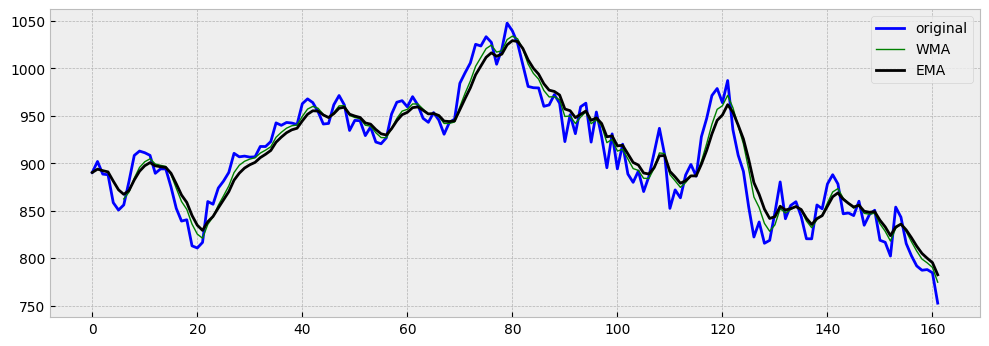

In [73]:
ema = exponential_moving_average(none_stationary_series, 0.3)
wma = weighted_moving_average(none_stationary_series, 7, [1,1,2,3,5,8,13])
with plt.style.context('bmh'):
    plt.figure(figsize=(12, 4))
    plt.plot(none_stationary_series, color='blue',label='original')
    plt.plot(wma, color='green', linewidth='1', label='WMA')
    plt.plot(ema, color='black', linewidth='2', label='EMA')
    plt.legend()

### **Выводы:**  
1. Поскольку выбранная начальная серия не содержала сезонность и циклы, то она приводилась к стационарному применению преобразований Бокса-Кокса и дифференцированию.  
2. Для такой серии достаточно было попробовать и сравнить преобразования с Moving Average, WMA and EMA, которые показали, что визуально лучше всего подходила WMA с весами равными числам Фибоначчи.  
3. Для стационарного ряда хорошо себя показывает сглаживание при помощи MA с большим периодом, которое позволяет убрать шум.  
4. Дополнительно, было посчитано как влияет на точность приближения увеличение числа периодов при сглаживании MA Как можно было предположить, это будет ухудшать точность.